In [1]:
%config Completer.use_jedi = False

In [145]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [10]:
df = pd.read_csv("data/train.csv")

In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
train_df, valid_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

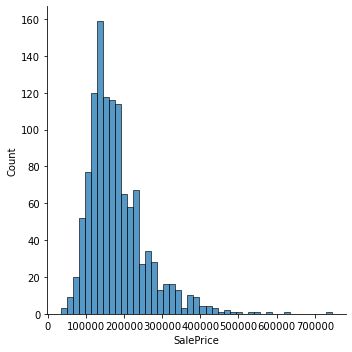

In [16]:
sns.displot(train_df["SalePrice"]);

$$\large{log1p(x) = log(x + 1)}$$

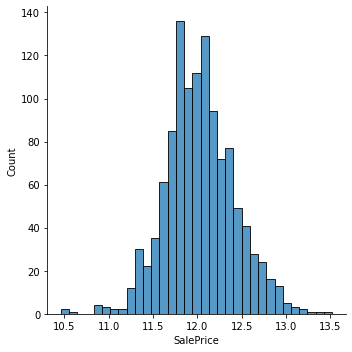

In [17]:
sns.displot(np.log(train_df["SalePrice"]));

In [25]:
list(train_df.columns)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [68]:
shapiro(np.log(train_df["SalePrice"]))

ShapiroResult(statistic=0.9924730658531189, pvalue=1.1478463420644403e-05)

In [22]:
train_df["SalesPriceLog"] = np.log(train_df["SalePrice"])
valid_df["SalesPriceLog"] = np.log(valid_df["SalePrice"])

/tmp/ipykernel_18646/596706393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["SalesPriceLog"] = np.log(train_df["SalePrice"])
/tmp/ipykernel_18646/596706393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["SalesPriceLog"] = np.log(valid_df["SalePrice"])


In [24]:
train_df.drop(columns=["Id"], inplace=True)
valid_df.drop(columns=["Id"], inplace=True)

/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
CAT_COLS = []
REAL_COLS = []

In [29]:
set(train_df["MSSubClass"]) == set(valid_df["MSSubClass"])

True

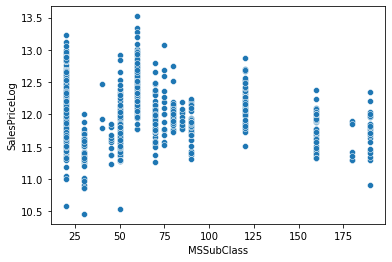

In [30]:
sns.scatterplot(x=train_df["MSSubClass"], y=train_df["SalesPriceLog"]);

In [32]:
train_df["MSSubClass"].value_counts().head(1)

20    434
Name: MSSubClass, dtype: int64

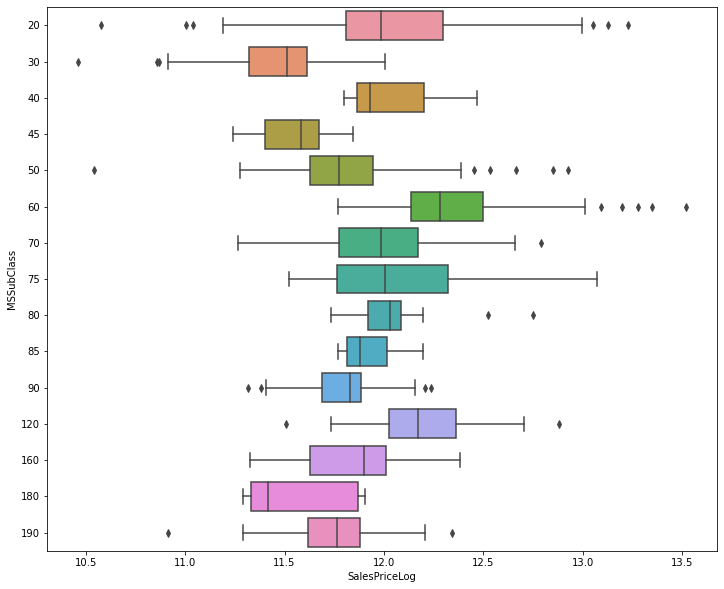

In [33]:
plt.figure(figsize=(12, 10))
sns.boxplot(x=train_df["SalesPriceLog"], y=train_df["MSSubClass"], orient="h");

In [36]:
CAT_COLS.append("MSSubClass")

In [38]:
train_df["MSZoning"].value_counts()

RL         924
RM         172
FV          53
RH          15
C (all)      4
Name: MSZoning, dtype: int64

In [41]:
train_df.groupby("MSSubClass")["MSZoning"].nunique()

MSSubClass
20     4
30     4
40     2
45     3
50     4
60     2
70     3
75     2
80     1
85     1
90     3
120    4
160    3
180    1
190    4
Name: MSZoning, dtype: int64

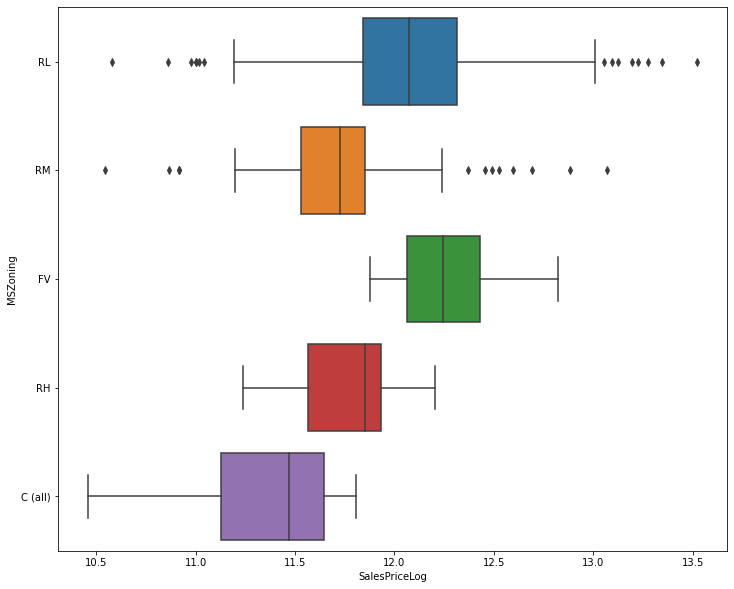

In [39]:
plt.figure(figsize=(12, 10))
sns.boxplot(x=train_df["SalesPriceLog"], y=train_df["MSZoning"], orient="h");

In [42]:
CAT_COLS.append("MSZoning")

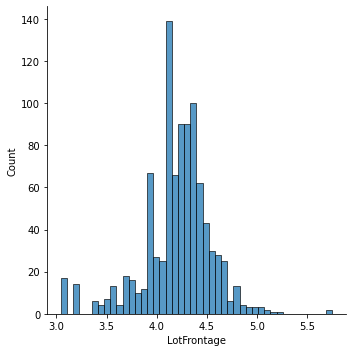

In [48]:
sns.displot(np.log(train_df["LotFrontage"]));

In [51]:
train_df["LotFrontage"].isna().any()

True

In [52]:
shapiro(np.log(train_df.loc[~train_df["LotFrontage"].isnull(), "LotFrontage"]))

ShapiroResult(statistic=0.9404715895652771, pvalue=4.504890239449144e-19)

In [56]:
train_df["LotFrontageLog"] = np.log(train_df["LotFrontage"])
valid_df["LotFrontageLog"] = np.log(valid_df["LotFrontage"])

/tmp/ipykernel_18646/1724650718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["LotFrontageLog"] = np.log(train_df["LotFrontage"])
/tmp/ipykernel_18646/1724650718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["LotFrontageLog"] = np.log(valid_df["LotFrontage"])


In [58]:
lot_frontage_imputer = SimpleImputer()
lot_frontage_imputer.fit(train_df[["LotFrontageLog"]])

SimpleImputer()

In [59]:
train_df[["LotFrontageLog"]] = lot_frontage_imputer.transform(train_df[["LotFrontageLog"]])
valid_df[["LotFrontageLog"]] = lot_frontage_imputer.transform(valid_df[["LotFrontageLog"]])

/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


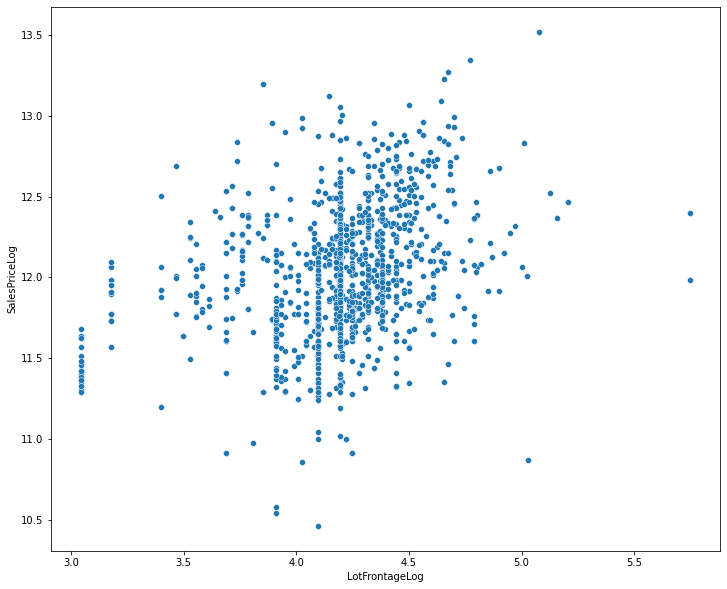

In [61]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x=train_df["LotFrontageLog"], y=train_df["SalesPriceLog"]);

In [62]:
REAL_COLS.append("LotFrontageLog")

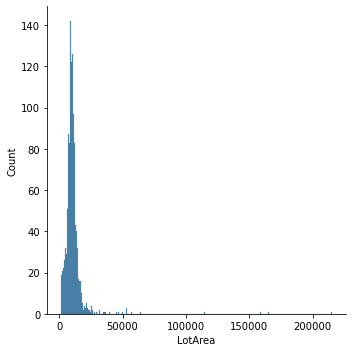

In [65]:
sns.displot(train_df["LotArea"]);

In [66]:
train_df["LotArea"].isnull().any()

False

In [67]:
shapiro(train_df["LotArea"])

ShapiroResult(statistic=0.3277750015258789, pvalue=0.0)

In [69]:
shapiro(np.log(train_df["LotArea"]))

ShapiroResult(statistic=0.9003234505653381, pvalue=6.889854138673963e-27)

In [70]:
train_df["LotAreaLog"] = np.log(train_df["LotArea"])
valid_df["LotAreaLog"] = np.log(train_df["LotArea"])

/tmp/ipykernel_18646/4095678443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["LotAreaLog"] = np.log(train_df["LotArea"])
/tmp/ipykernel_18646/4095678443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["LotAreaLog"] = np.log(train_df["LotArea"])


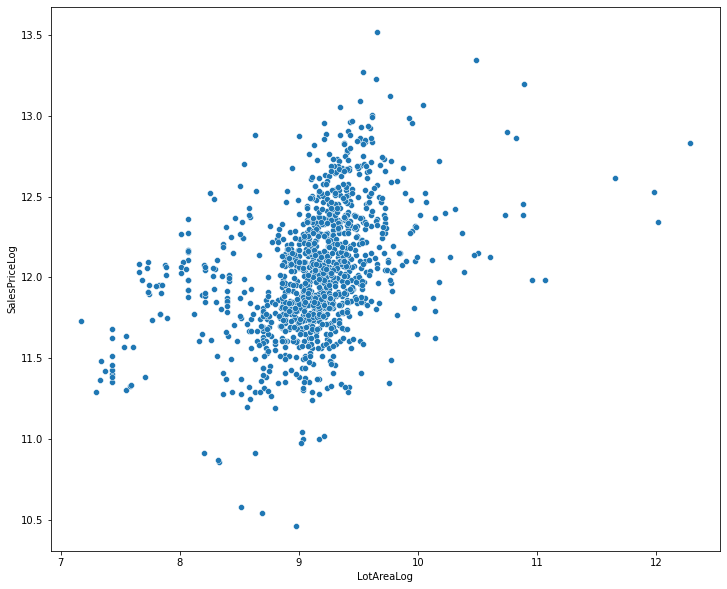

In [71]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x=train_df["LotAreaLog"], y=train_df["SalesPriceLog"]);

/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


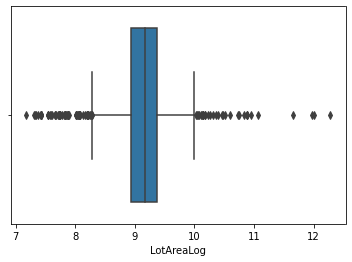

In [72]:
sns.boxplot(train_df["LotAreaLog"]);

/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


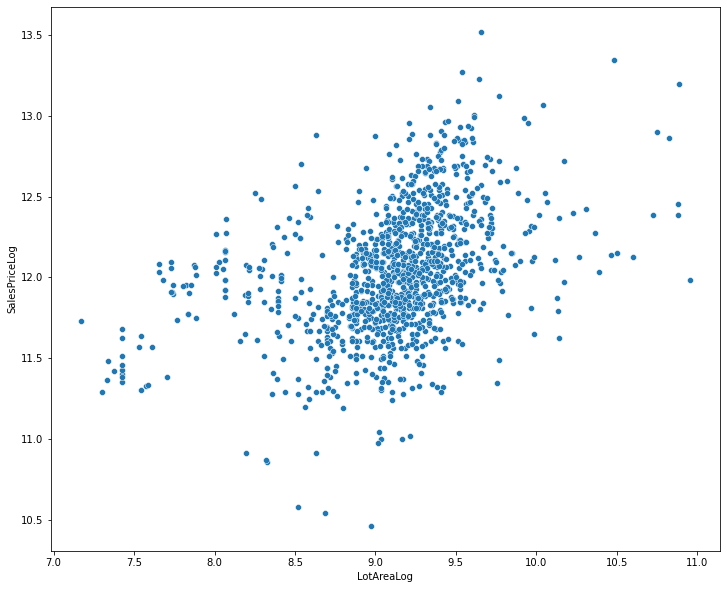

In [74]:
plt.figure(figsize=(12, 10))
sns.scatterplot("LotAreaLog", "SalesPriceLog", data=train_df.loc[train_df["LotAreaLog"] < 11]);

In [75]:
train_df = train_df.loc[train_df["LotAreaLog"] < 11, :]

/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


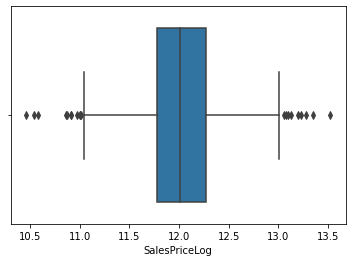

In [76]:
sns.boxplot(train_df["SalesPriceLog"]);

/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


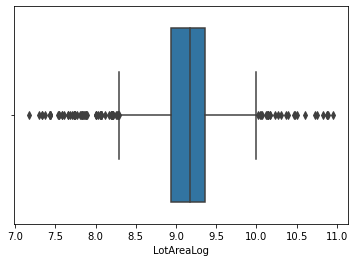

In [77]:
sns.boxplot(train_df["LotAreaLog"]);

In [80]:
REAL_COLS.append("LotAreaLog")

In [89]:
CAT_COLS

['MSSubClass', 'MSZoning']

In [90]:
REAL_COLS

['LotFrontageLog', 'LotAreaLog']

In [87]:
column_transformer = ColumnTransformer(
    [
        ("real_cols", StandardScaler(), REAL_COLS),
        ("cat_cols", OneHotEncoder(), CAT_COLS),
    ]
)

In [141]:
pipeline = Pipeline(
    [
        ("transofrm", column_transformer),
        ("imputer", SimpleImputer()),
        ("model", KNeighborsRegressor(n_neighbors=13))
    ]
)

In [142]:
pipeline.fit(train_df, train_df["SalesPriceLog"])

Pipeline(steps=[('transofrm',
                 ColumnTransformer(transformers=[('real_cols', StandardScaler(),
                                                  ['LotFrontageLog',
                                                   'LotAreaLog']),
                                                 ('cat_cols', OneHotEncoder(),
                                                  ['MSSubClass',
                                                   'MSZoning'])])),
                ('imputer', SimpleImputer()),
                ('model', KNeighborsRegressor(n_neighbors=13))])

In [143]:
predict = pipeline.predict(valid_df)

In [144]:
mean_absolute_error(valid_df["SalePrice"], np.exp(predict))

47352.98240592683

$$\large{MAE = \frac{1}{N}\sum_{i}^{N}|\hat{y_{i}} - y|}$$